# **Prueba técnica - Came**

---

# Consignas : 
+ 1 Limpiar la base de duplicados. `OK`
+ 2 Crear una hoja llamada "TABLAS". `OK`
+ 3 Calcular la variación interanual de la producción promedio. `OK`
+ 4 Calcular la variación interanual de la producción promedio por provincia. `OK`
+ 5 Realizar tablas para la pregunta 2, 3, 4, 5 y 6 `OK`
+ 6 Realizar tablas cruzadas por rubro para la pregunta 5 y 6. `OK`
+ 7 Realizar en Word, un breve informe (no más de 2 hojas) para presentar los datos obtenidos. Incluir 2 gráfficos a elección.  `OK`
+ 8 Armar placas de presentación tipo Dashboard (al menos 2). En Canva o programa similar. `OK`

---

In [60]:
# Librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

#### Ingestamos los datos del excel "PRUEBA TÉCNICA - ESTADISTICAS E INFORMES"

In [61]:
# Ingestamos el archivo de excel, que contiene 7 hojas de utilidad
excel = pd.read_excel("Datasets/PRUEBA TÉCNICA - ESTADISTICAS E INFORMES 2.XLSX",sheet_name=None)

# Almacenamos las hojas en un diccionario de Pandas
hojas = {}
for nombre_hoja, datos_hoja in excel.items():
    hojas[nombre_hoja] = datos_hoja

# Accedemos cada hoja
base = hojas["Base"]
consignas = hojas["CONSIGNAS"]

# Borramos los duplicados 
base.drop_duplicates(inplace=True)

base["RUBRO"] = base["RUBRO"].str.replace("Electrònico Mecànico e Informàtica","Electrónico mecánico e informática")
base["RUBRO"] = base["RUBRO"].str.replace("Calzado y Marroquinerìa","Calzado y marroquinería")
base["RUBRO"] = base["RUBRO"].str.replace("Material de Transporte","Material de transporte")

# Exportamos a CSV 
base.to_csv("Datasets/base.csv",index=False)


In [62]:
# Observamos las primeras 10 columnas
base.iloc[:,:10].sample(5)

,FECHA,PYME,RUBRO,Principal producto,Provincia,Localidad,CANTIDAD DE EMPLEADOS DE LA EMPRESA,"Su empresa: Produce, Importa, Produce e importa o era productora y migró a importadora",1. Variación de la Producción (diciembre 2018 \nvs. \ndiciembre 2017:),2- La rentabilidad de su industria en diciembre 2018 fue:
113,2019-01-15 16:18:55,ROLDAN EMILIO,Alimentos,ELABORACION DE ACEITUNAS,La Rioja,VILLA MAZAN,12.0,Produce,-15.0,Nula
20,2019-01-09 00:43:39,INGENIO VERDE,Otro,Cartón y plástico (a partir de scrap de fábrica),Tierra del Fuego,"ingeniero varela 692, río grande",18.0,Produce,-25.0,Nula
74,2019-01-11 16:25:08,EXTRACTORES TST,"Productos de metal, maquinaria y equipo",extractores y campanas de metal,Buenos Aires,ruta pcial 4 n 752 lavallol,20.0,Produce,25.0,Positiva
126,2019-01-16 11:58:36,VIDRIAL SRL,"Productos de metal, maquinaria y equipo",FABRICACION DE CARPINTERIAS DE ALUMINIO - VIDR...,Tucuman,"avenida siria 1633, san miguel de tucuman",100.0,Produce,5.0,Positiva
3,2019-01-04 14:11:36,RUIBAL HNOS SRL,Otro,juegos y juguetes,CABA,rivera indarte 2986,65.0,Produce,-5.0,Nula


In [63]:
# Observamos las últimas 10 columnas
base.iloc[:,10:].sample(5)

,3- ¿Cómo evalúa la situación económica actual de su empresa?,"4- En relación a los niveles actuales, ¿cómo cree que evolucionará la producción de su empresa en los próximos meses?",5- Tiene planeado realizar inversiones en 2019?,6- ¿Cómo evalúa el momento actual para invertir en su empresa?,7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad?,"8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?",9- ¿Cuanto cree que valdrá el dolar el 31/12/2019?,10- ¿Qué tipo de reformas considera que se deberian implementar para mejorar la situacion de su sector?,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,"11 - ¿Cuál es a su criterio, la medida a tomar que más contribuiría a la reactivación de su sector?",Observaciones
79,Mala,Aumentará,Si,Muy Malo,70,20.0,43.0,Reforma tributaria,Reforma laboral,NaN,NaN,NaN,NaN,menor pago de impuestos dentro la provincia .,NaN
155,Regular,Se mantendrá,No,Regular,85,30.0,43.0,Reforma tributaria,Reforma laboral,NaN,NaN,NaN,NaN,Avanzar tecnologicamente para lograr una mayor...,Enluvil afirma estar equilibrado económicament...
112,Regular,Se mantendrá,No,Regular,70,30.0,45.0,Reforma tributaria,Reforma laboral,NaN,NaN,NaN,NaN,"REDUCIR PRESION TRIBUTARIA , FLEXIBILIZACION L...",NaN
20,Regular,Aumentará,No,Regular,20,40.0,47.0,Reforma de acceso al financiamiento,NaN,NaN,NaN,NaN,NaN,Reactivación de industria a nivel nacional,"Si la industria en general no trabaja, nosotro..."
117,Regular,Se mantendrá,No,Muy Malo,60,25.0,45.0,Reforma tributaria,Reforma laboral,NaN,NaN,NaN,NaN,Limitar las importaciones en el sector.,NaN


---

#### 3_ Calcular la variación interanual de la producción promedio.

In [64]:
consigna3 = base["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"].mean().round(2)
print(f"La variación interanual de la producción promedio fue de {consigna3}.")

La variación interanual de la producción promedio fue de -2.16.


---

#### 4_ Calcular la variación interanual de la producción promedio por provincia.

In [65]:
consigna4 = base[["Provincia  ","1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"]].groupby("Provincia  ").mean().round(2).reset_index()
consigna4["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] =consigna4["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] / 100
consigna4

,Provincia,1. Variación de la Producción (diciembre 2018 \nvs. \ndiciembre 2017:)
0,Buenos Aires,0.0024
1,CABA,-0.1500
2,Chaco,0.0911
3,Chubut,0.3143
4,Cordoba,-0.0712
5,Entre Rios,-0.0833
6,Jujuy,-0.0409
7,La Rioja,-0.1570
8,Mendoza,0.1150
9,Misiones,-0.0032


#### Y la calculamos también por Rubro

In [66]:
# Calculamos por Rubro
delta_por_rubro = base[["RUBRO","1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"]].groupby("RUBRO").mean().round(2).reset_index()
delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] = delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] / 100
delta_por_rubro

,RUBRO,1. Variación de la Producción (diciembre 2018 \nvs. \ndiciembre 2017:)
0,Alimentos,-0.0193
1,Calzado y marroquinería,-0.2008
2,Electrónico mecánico e informática,-0.1614
3,Madera y muebles,-0.0167
4,Material de transporte,-0.1833
5,Minerales no metálicos,-0.1008
6,Otro,0.0467
7,"Papel, carton, edición e impresión",-0.0356
8,Productos de caucho y plásticos,0.0407
9,"Productos de metal, maquinaria y equipo",0.0683


---

#### 5_ Realizar tablas para la pregunta 2, 3, 4, 5 y 6 

In [67]:
# Para la consigna 5 consigop los nombres de las tablas
columnas = base.columns[9:14].tolist()
columnas

['2- La rentabilidad de su industria en diciembre 2018 fue:',
 '3- ¿Cómo evalúa la situación económica actual de su empresa? ',
 '4- En relación a los niveles actuales, ¿cómo cree que evolucionará la producción de su empresa en los próximos meses?',
 '5- Tiene planeado realizar inversiones en 2019?',
 '6- ¿Cómo evalúa el momento actual para invertir en su empresa?']

In [68]:
# Para realizar la consigna 5 podemos iterar ya que es realizar los mimsmos calculos :)
lista_tablas = []
for elemento in columnas :     
    tabla = base[elemento].value_counts().reset_index()
    tabla["%"] = (tabla["count"] / tabla["count"].sum())
    tabla.loc[len(tabla)] = ["Total",tabla["count"].sum(),tabla["%"].sum()]
    lista_tablas.append(tabla)

In [69]:
lista_tablas[0]

,2- La rentabilidad de su industria en diciembre 2018 fue:,count,%
0,Nula,74,0.413408
1,Positiva,60,0.335196
2,Negativa,43,0.240223
3,NS/NC,2,0.011173
4,Total,179,1.000000


In [70]:
lista_tablas[1]

,3- ¿Cómo evalúa la situación económica actual de su empresa?,count,%
0,Regular,88,0.491620
1,Buena,45,0.251397
2,Mala,31,0.173184
3,Crítica,11,0.061453
4,Muy Buena,4,0.022346
5,Total,179,1.000000


In [71]:
lista_tablas[2]

,"4- En relación a los niveles actuales, ¿cómo cree que evolucionará la producción de su empresa en los próximos meses?",count,%
0,Se mantendrá,95,0.530726
1,Aumentará,41,0.229050
2,Bajará,35,0.195531
3,NS/NC,8,0.044693
4,Total,179,1.000000


In [72]:
lista_tablas[3]

,5- Tiene planeado realizar inversiones en 2019?,count,%
0,No,104,0.581006
1,Lo estoy evaluando,37,0.206704
2,Si,35,0.195531
3,NS/NC,3,0.016760
4,Total,179,1.000000


In [73]:
lista_tablas[4]

,6- ¿Cómo evalúa el momento actual para invertir en su empresa?,count,%
0,Malo,68,0.379888
1,Regular,67,0.374302
2,Muy Malo,27,0.150838
3,Bueno,11,0.061453
4,NS/NC,4,0.022346
5,Muy Bueno,2,0.011173
6,Total,179,1.000000


---

#### 6_ Realizar tablas cruzadas por rubro para la pregunta 5 y 6.

In [74]:
aux = ["5- Tiene planeado realizar inversiones en 2019?","6- ¿Cómo evalúa el momento actual para invertir en su empresa?"]
tablas_5_6_rubro = []
for i in aux : 
    x = base[["RUBRO",i]].value_counts().reset_index()
    df_pivot = x.pivot_table(index="RUBRO", columns=[i], values='count', fill_value=0)
    df_pivot["Total"] = df_pivot.sum(axis=1)
    columns = df_pivot.columns[0:]
    for n in columns :
        df_pivot[n] = ((df_pivot[n] / df_pivot["Total"] ) ).round(2)
    tablas_5_6_rubro.append(df_pivot)    

In [75]:
tablas_5_6_rubro[0]

5- Tiene planeado realizar inversiones en 2019?,Lo estoy evaluando,NS/NC,No,Si,Total
RUBRO,,,,,
Alimentos,0.23,0.02,0.55,0.20,1.0
Calzado y marroquinería,0.00,0.00,0.80,0.20,1.0
Electrónico mecánico e informática,0.14,0.00,0.86,0.00,1.0
Madera y muebles,0.00,0.09,0.45,0.45,1.0
Material de transporte,0.17,0.00,0.50,0.33,1.0
Minerales no metálicos,0.23,0.00,0.62,0.15,1.0
Otro,0.17,0.00,0.83,0.00,1.0
"Papel, carton, edición e impresión",0.33,0.00,0.58,0.08,1.0
Productos de caucho y plásticos,0.00,0.00,0.71,0.29,1.0


In [76]:
tablas_5_6_rubro[1]

6- ¿Cómo evalúa el momento actual para invertir en su empresa?,Bueno,Malo,Muy Bueno,Muy Malo,NS/NC,Regular,Total
RUBRO,,,,,,,
Alimentos,0.09,0.30,0.00,0.11,0.00,0.50,1.0
Calzado y marroquinería,0.00,0.60,0.00,0.20,0.00,0.20,1.0
Electrónico mecánico e informática,0.00,0.57,0.00,0.14,0.00,0.29,1.0
Madera y muebles,0.00,0.45,0.00,0.27,0.09,0.18,1.0
Material de transporte,0.00,0.50,0.00,0.17,0.17,0.17,1.0
Minerales no metálicos,0.08,0.15,0.08,0.15,0.00,0.54,1.0
Otro,0.00,0.17,0.00,0.33,0.00,0.50,1.0
"Papel, carton, edición e impresión",0.00,0.50,0.00,0.25,0.00,0.25,1.0
Productos de caucho y plásticos,0.07,0.50,0.00,0.14,0.00,0.29,1.0


---

#### Extra_ Realizamos las tablas de las preguntas 7, 8, 9, y 10

In [77]:
pregunta7 = base[["RUBRO","7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad? "]].groupby("RUBRO").mean().reset_index()
pregunta7["7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad? "] = pregunta7["7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad? "]/100
pregunta7

,RUBRO,7- ¿Con qué porcentaje de su capacidad instalada está produciendo su empresa en la actualidad?
0,Alimentos,0.598864
1,Calzado y marroquinería,0.780000
2,Electrónico mecánico e informática,0.500000
3,Madera y muebles,0.618182
4,Material de transporte,0.450000
5,Minerales no metálicos,0.676923
6,Otro,0.416667
7,"Papel, carton, edición e impresión",0.579167
8,Productos de caucho y plásticos,0.603571
9,"Productos de metal, maquinaria y equipo",0.586207


In [78]:
pregunta8 = base[["RUBRO","8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"]].groupby("RUBRO").mean().reset_index()
pregunta8["8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"] = pregunta8["8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"] /100
pregunta8

,RUBRO,"8- Comparando los precios actuales de la economía con los que habrá dentro de un año, es decir, en diciembre de 2019, ¿en qué porcentaje espera que los precios suban en los próximos doce meses?"
0,Alimentos,0.336905
1,Calzado y marroquinería,0.350000
2,Electrónico mecánico e informática,0.290000
3,Madera y muebles,0.323636
4,Material de transporte,0.325000
5,Minerales no metálicos,0.370833
6,Otro,0.375000
7,"Papel, carton, edición e impresión",0.281667
8,Productos de caucho y plásticos,0.360714
9,"Productos de metal, maquinaria y equipo",0.331481


In [79]:
base["9- ¿Cuanto cree que valdrá el dolar el 31/12/2019?"].mean() # Blue a $70 y oficial 60

49.1859756097561

In [80]:
columnas = base.columns[17:22]
listaff = []
for elemento in columnas : 
    df = base[elemento].value_counts().reset_index()
    listaff.append(df)
for elemento in listaff :
    elemento.columns = listaff[0].columns    
df_concat = pd.concat(listaff, ignore_index=True)    
pregunta10 = df_concat.groupby('10- ¿Qué tipo de reformas considera que se deberian implementar para mejorar la situacion de su sector?').sum().sort_values(by="count",ascending=False).reset_index()
pregunta10

,10- ¿Qué tipo de reformas considera que se deberian implementar para mejorar la situacion de su sector?,count
0,Reforma tributaria,132
1,Reforma laboral,98
2,Reforma de acceso al financiamiento,84
3,Reforma de barreras tecnológicas,33
4,Reformas logísticas,32
5,Otras,8
6,,1


---

#### Realizamos unos análisis por rubro

In [81]:
# Cantidad de empleados por rubro
empleados_por_rubro = base[["RUBRO","CANTIDAD DE EMPLEADOS DE LA EMPRESA"]].groupby(["RUBRO"]).mean().round(2).reset_index()
empleados_por_rubro = empleados_por_rubro.sort_values(by = "CANTIDAD DE EMPLEADOS DE LA EMPRESA" ,ascending=False)
empleados_por_rubro

,RUBRO,CANTIDAD DE EMPLEADOS DE LA EMPRESA
8,Productos de caucho y plásticos,54.62
5,Minerales no metálicos,48.83
9,"Productos de metal, maquinaria y equipo",44.68
0,Alimentos,41.39
6,Otro,27.50
3,Madera y muebles,21.45
4,Material de transporte,19.17
10,Químicos,18.36
7,"Papel, carton, edición e impresión",18.33
1,Calzado y marroquinería,16.25


In [82]:
# Cantidad de rubros
rubros = base["RUBRO"].value_counts().reset_index()
rubros

,RUBRO,count
0,Alimentos,44
1,"Productos de metal, maquinaria y equipo",29
2,Textil,20
3,Productos de caucho y plásticos,14
4,Minerales no metálicos,13
5,"Papel, carton, edición e impresión",12
6,Químicos,12
7,Madera y muebles,11
8,Electrónico mecánico e informática,7
9,Otro,6


---

## Realizamos algunos gráficos de prueba y exportamos 2 para el informe

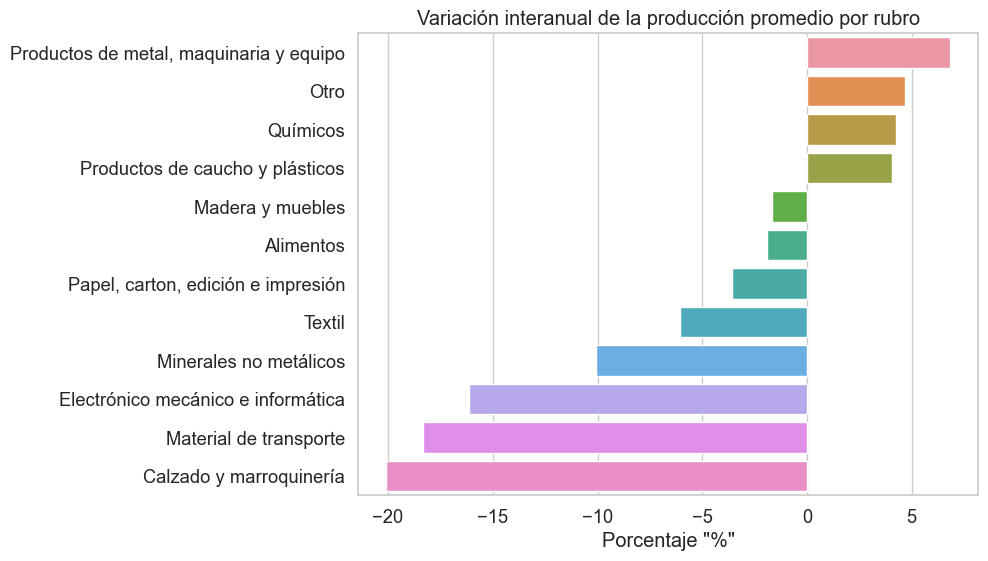

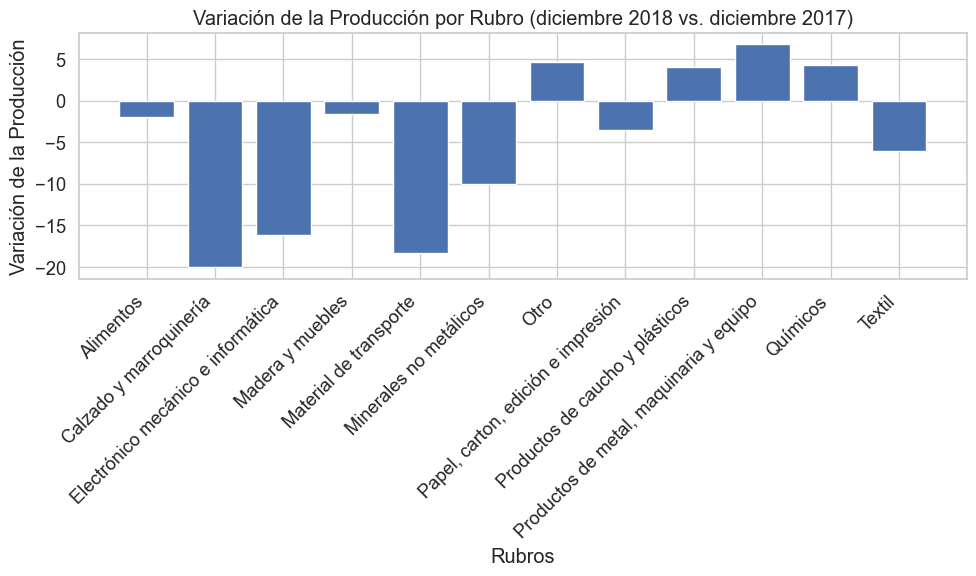

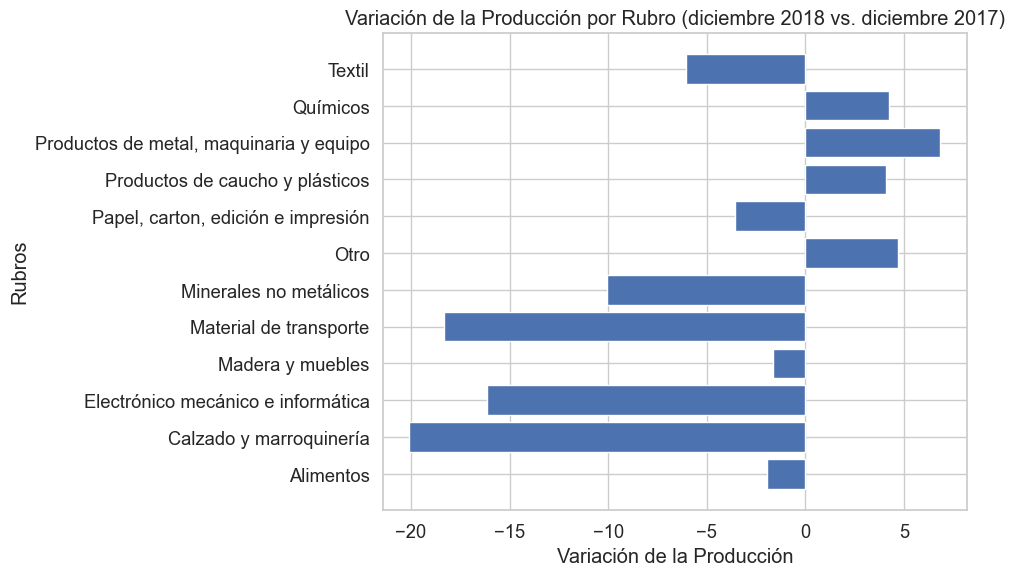

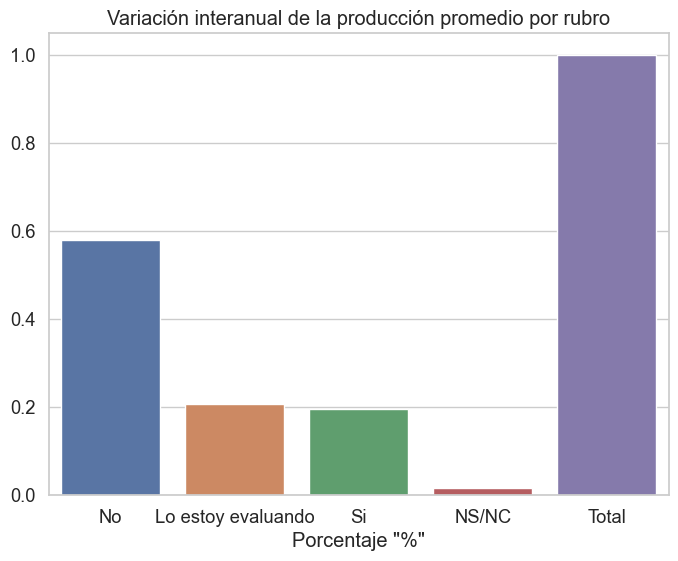

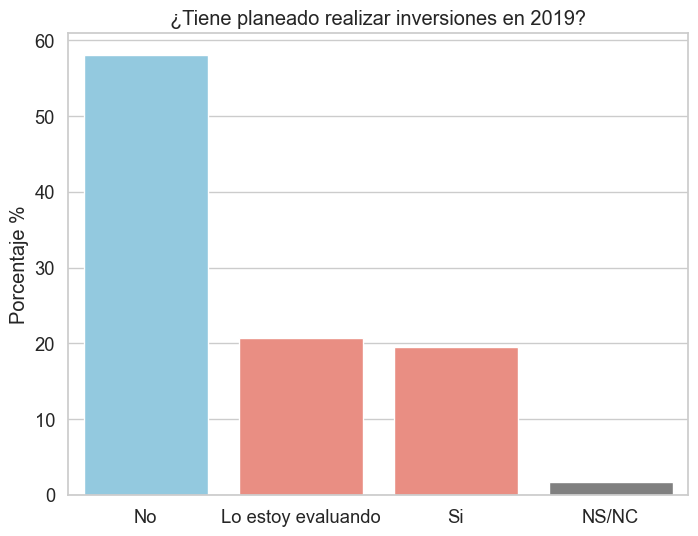

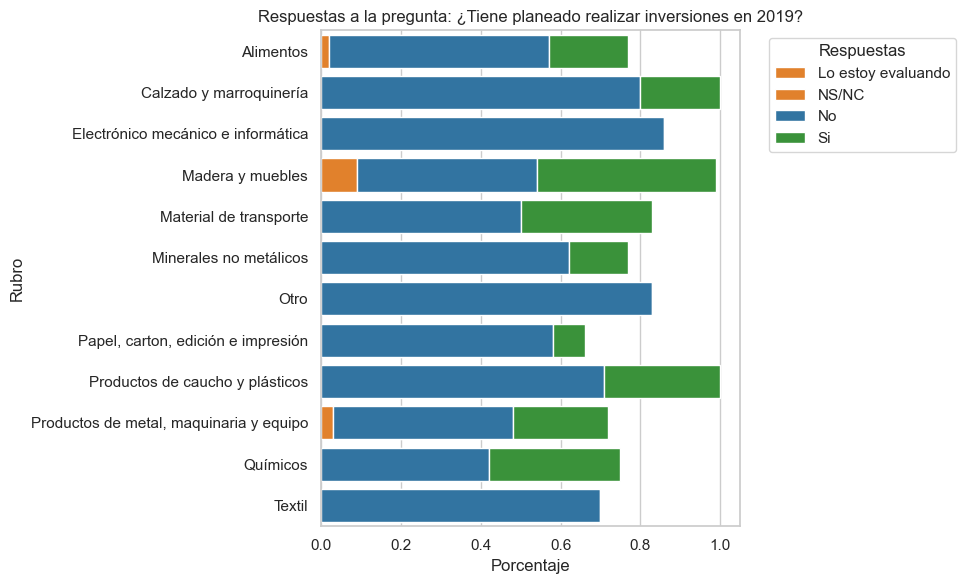

In [83]:
# Configurar el estilo de la gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})
delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] = delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"] * 100
f_sorted = delta_por_rubro.sort_values(by="1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)", ascending=False)
# Creamos un grafico de barras horizontal
ax = sns.barplot(x="1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)", y='RUBRO', data=f_sorted)

# Añadimos las etiquetas y el título
ax.set_xlabel('Porcentaje "%"')
ax.set_ylabel('')
ax.set_title('Variación interanual de la producción promedio por rubro')
# Exportar el gráfico como imagen en formato PNG
plt.savefig('imgs/grafico_barras.png', bbox_inches='tight')
# Mostrar el gráfico
plt.show()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(delta_por_rubro['RUBRO'], delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rubros')
plt.ylabel('Variación de la Producción')
plt.title('Variación de la Producción por Rubro (diciembre 2018 vs. diciembre 2017)')
plt.tight_layout()
plt.show()
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(delta_por_rubro['RUBRO'], delta_por_rubro["1. Variación de la Producción    (diciembre 2018 \nvs. \ndiciembre 2017:)"])
plt.xlabel('Variación de la Producción')
plt.ylabel('Rubros')
plt.title('Variación de la Producción por Rubro (diciembre 2018 vs. diciembre 2017)')
plt.tight_layout()
plt.show()

# Configurar el estilo de la gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})
# Creamos un grafico de barras horizontal
ax = sns.barplot(x="5- Tiene planeado realizar inversiones en 2019?", y='%', data=lista_tablas[3])

# Añadimos las etiquetas y el título
ax.set_xlabel('Porcentaje "%"')
ax.set_ylabel('')
ax.set_title('Variación interanual de la producción promedio por rubro')
# Mostrar el gráfico
plt.show()

# gráfico

sns.set(style='whitegrid', font_scale=1.2, rc={"figure.figsize":(8,6)})
# eliminamos el total
df2 = lista_tablas[3].drop(index=lista_tablas[3].index[-1])
df2["%"] = df2["%"] * 100
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df2["5- Tiene planeado realizar inversiones en 2019?"], y=df2["%"], palette=["skyblue", "salmon", "salmon", "gray"])

# Título y etiquetas
plt.title('¿Tiene planeado realizar inversiones en 2019?')
plt.xlabel('')
plt.ylabel('Porcentaje %')
plt.savefig('imgs/grafico_barras2.png', bbox_inches='tight')
# Mostrar el gráfico
plt.show()


tablas_5_6_rubro[0] = tablas_5_6_rubro[0].reset_index()
# Definir el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de barras apiladas horizontales
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Lo estoy evaluando", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:orange", label="Lo estoy evaluando")
ax = sns.barplot(x="NS/NC", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:orange", label="NS/NC")
ax = sns.barplot(x="No", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:blue", label="No", left=tablas_5_6_rubro[0]["NS/NC"])
ax = sns.barplot(x="Si", y="RUBRO", data=tablas_5_6_rubro[0], color="tab:green", label="Si", left=tablas_5_6_rubro[0]["NS/NC"] + tablas_5_6_rubro[0]["No"])

# Configurar etiquetas y leyenda
plt.legend(title="Respuestas", bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas de los ejes y título
plt.xlabel("Porcentaje")
plt.ylabel("Rubro")
plt.title("Respuestas a la pregunta: ¿Tiene planeado realizar inversiones en 2019?")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

---

---

# Exportamos todas las respuestas al Excel

In [84]:
# Creamos un objeto ExcelWriter para escribir en el archivo
with pd.ExcelWriter('Datasets/RESOLUCIÓN PRUEBA TÉCNICA - ESTADISTICAS E INFORMES.xlsx', engine='openpyxl') as writer:
    # Escribimos el DataFrame df1 en la hoja 'Tabla_Completa'
    base.to_excel(writer, sheet_name='Base', index=False)

    # Consigna 3 hardcodear

    # Consigna 4
    consigna4.to_excel(writer, sheet_name='Tablas',startrow= 2, index=False)
    delta_por_rubro.to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 4, index=False)

    # Consigna 5
    lista_tablas[0].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 6 + len(delta_por_rubro), index=False)
    lista_tablas[1].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 8 + len(lista_tablas[0]) + len(delta_por_rubro), index=False)
    lista_tablas[2].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 10 + len(lista_tablas[0])+ len(lista_tablas[1])+ len(delta_por_rubro), index=False)
    lista_tablas[3].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 12 + len(lista_tablas[0])+ len(lista_tablas[1])+ len(lista_tablas[2])+ len(delta_por_rubro), index=False)
    lista_tablas[4].to_excel(writer, sheet_name='Tablas', startrow=len(consigna4) + 14 + len(lista_tablas[0])+ len(lista_tablas[1])+ len(lista_tablas[2])+ len(lista_tablas[3])+ len(delta_por_rubro), index=False)

    # Consigna 6
    rubros.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,index=False)
    empleados_por_rubro.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 4 + len(rubros.columns) ,index=False)
    tablas_5_6_rubro[0].to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(rubros) + 3)
    tablas_5_6_rubro[1].to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(tablas_5_6_rubro[0]) + 5 + len(rubros))
    pregunta7.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(tablas_5_6_rubro[0]) + 7 + len(rubros) + len(tablas_5_6_rubro[1]),index=False)
    pregunta8.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2,startrow=len(tablas_5_6_rubro[0]) + 9 + len(rubros)+ len(tablas_5_6_rubro[1]) + + len(tablas_5_6_rubro[1]),index=False)
    
    pregunta10.to_excel(writer, sheet_name='Tablas',startcol=len(lista_tablas[0].columns) + 2 + len(tablas_5_6_rubro[1].columns) ,index=False)
# El objeto ExcelWriter se cierra automáticamente al salir del bloque with
# Para ir agregando voy sumando a las filas y lo mismo a las columnas
